<a href="https://colab.research.google.com/github/Benendead/LSTMjazz/blob/master/LSTMjazz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup for Music21

In [0]:
# Check which version of Linux we have, and our distribution.
!uname
!uname -r
!lsb_release -a

# Updates the Linux package installer thing we need to use.
!apt upgrade

# Allows us to install directly from source, as we're about to do for Lilypond.
!sed -i '/deb-src/s/^# //' /etc/apt/sources.list && apt update

# Build the dependencies for Lilypond.
!apt build-dep lilypond

# Lilypond also wants us to run this.
!apt install autoconf fonts-texgyre texlive-lang-cyrillic

# Now install Lilypond.
!apt install lilypond

Linux
4.14.65+
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.1 LTS
Release:	18.04
Codename:	bionic


In [0]:
# Also install Musescore.
!apt install musescore

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host desktop-file-utils fluidr3mono-gm-soundfont
  geoclue-2.0 geoip-database gstreamer1.0-plugins-base iio-sensor-proxy
  libavahi-core7 libavahi-glib1 libbind9-160 libbrotli1 libcap2-bin
  libcdparanoia0 libdaemon0 libdns1100 libgeoclue-2-0 libgeoip1
  libgl1-mesa-glx libgstreamer-plugins-base1.0-0 libgstreamer1.0-0 libhyphen0
  libisc169 libisccc160 libisccfg160 liblwres160 libmbim-glib4 libmbim-proxy
  libmm-glib0 libnl-genl-3-200 libnss-mdns liborc-0.4-0 libpam-cap
  libportaudio2 libpulsedsp libqmi-glib5 libqmi-proxy libqt5help5
  libqt5positioning5 libqt5qml5 libqt5quick5 libqt5sensors5 libqt5sql5-sqlite
  libqt5svg5 libqt5webchannel5 libqt5webkit5 libqt5xmlpatterns5
  libvisual-0.4-0 libwoff1 modemmanager musescore-common pulseaudio-utils
  qml-module-qtgraphicaleffects qml-module-qtquick-controls
  qml-module-

In [0]:
!whereis musescore
!whereis lilypond

musescore: /usr/bin/musescore /usr/share/man/man1/musescore.1.gz
lilypond: /usr/bin/lilypond.real /usr/bin/lilypond /usr/lib/x86_64-linux-gnu/lilypond /usr/share/lilypond /usr/share/man/man1/lilypond.1.gz


# Import Libraries and Data

In [1]:
!pip install music21

# m21.environment.set('pdfPath', '/usr/bin/musescore')
# m21.environment.set('graphicsPath', '/usr/bin/musescore')
# m21.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')
# m21.environment.UserSettings()['lilypondPath'] = '/usr/bin/lilypond'

In [0]:
import music21 as m21
import glob

In [3]:
!git clone https://github.com/Benendead/LSTMjazz/

Cloning into 'LSTMjazz'...
remote: Enumerating objects: 139, done.
remote: Total 139 (delta 0), reused 0 (delta 0), pack-reused 139
Receiving objects: 100% (139/139), 365.61 KiB | 1.25 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [4]:
# Check out the directory.
!ls LSTMjazz

Datasets  Keyboard.py  LSTMjazz.ipynb  README.md


In [5]:
# Find the songs.
!ls LSTMjazz/Datasets/"Omnibook Midi"

 An_Oscar_For_Treadwell.mid   Kim_2.mid
 Another_Hairdo.mid	      Ko_Ko.mid
 Anthropology.mid	      Laird_Baird.mid
 Au_Private_1.mid	      Marmaduke.mid
 Au_Private_2.mid	      Mohawk_1.mid
 Back_Home_Blues.mid	      Mohawk_2.mid
 Barbados.mid		      Moose_The_Mooche.mid
"Billie's_Bounce.mid"	      My_Little_Suede_Shoes.mid
 Bird_Gets_The_Worm.mid      "Now's_The_Time_1.mid"
 Bloomdido.mid		     "Now's_The_Time_2.mid"
 Blue_Bird.mid		      Ornithology.mid
 Blues_For_Alice.mid	      Passport.mid
 Buzzy.mid		      Perhaps.mid
 Card_Board.mid		      Red_Cross.mid
 Celerity.mid		      Relaxing_With_Lee.mid
 Chasing_The_Bird.mid	      Scrapple_From_The_Apple.mid
 Cheryl.mid		      Segment.mid
 Chi_Chi.mid		      Shawnuff.mid
 Confirmation.mid	      Si_Si.mid
 Cosmic_Rays.mid	      Steeplechase.mid
 Dewey_Square.mid	      The_Bird.mid
 Diverse.mid		      Thriving_From_A_Riff.mid
 Donna_Lee.mid		      Visa.mid
 KC_Blues.mid		      Warming_Up_A_Riff.mid
 Kim_1.mid		      Yardbird_Suite.mid


In [126]:
# Import the songs into a list.

streams = []
i = 1
for xml_file in glob.glob("LSTMjazz/Datasets/*/*.xml"): # Selects all .xml files in the Datasets folder.
    print('Processing song ', i, ":", xml_file)
    newSong = m21.converter.parse(xml_file)
    streams.append(newSong)
    i = i + 1

Processing song  1 : LSTMjazz/Datasets/Omnibook Mxml/Thriving_From_A_Riff.xml
Processing song  2 : LSTMjazz/Datasets/Omnibook Mxml/Confirmation.xml
Processing song  3 : LSTMjazz/Datasets/Omnibook Mxml/Blue_Bird.xml
Processing song  4 : LSTMjazz/Datasets/Omnibook Mxml/Donna_Lee.xml
Processing song  5 : LSTMjazz/Datasets/Omnibook Mxml/Bird_Gets_The_Worm.xml
Processing song  6 : LSTMjazz/Datasets/Omnibook Mxml/My_Little_Suede_Shoes.xml
Processing song  7 : LSTMjazz/Datasets/Omnibook Mxml/Relaxing_With_Lee.xml
Processing song  8 : LSTMjazz/Datasets/Omnibook Mxml/Passport.xml
Processing song  9 : LSTMjazz/Datasets/Omnibook Mxml/Mohawk_1.xml
Processing song  10 : LSTMjazz/Datasets/Omnibook Mxml/Warming_Up_A_Riff.xml
Processing song  11 : LSTMjazz/Datasets/Omnibook Mxml/Au_Private_2.xml
Processing song  12 : LSTMjazz/Datasets/Omnibook Mxml/Barbados.xml
Processing song  13 : LSTMjazz/Datasets/Omnibook Mxml/Anthropology.xml
Processing song  14 : LSTMjazz/Datasets/Omnibook Mxml/Laird_Baird.xml
P

# Format Data

In [0]:
def formatStream(stream):
  m21.harmony.realizeChordSymbolDurations(stream)           # Fills out chords' proper durations.
  key = stream.analyze("key")                               # Finds how far off we are from C.
  i = m21.interval.Interval(key.tonic, m21.pitch.Pitch("C"))
  transposedStream = stream.transpose(i)                    # Transposes us that far to C.
  return transposedStream

In [130]:
# Realize chord durations and also transpose all songs to Cmaj or Amin.
betterStreams = []

i = 1
for s in streams:
  print('Processing song', i)
  newStream = formatStream(s)
  betterStreams.append(newStream)
  i = i + 1

Processing song 1
Processing song 2
Processing song 3
Processing song 4
Processing song 5
Processing song 6
Processing song 7
Processing song 8
Processing song 9
Processing song 10
Processing song 11
Processing song 12
Processing song 13
Processing song 14
Processing song 15
Processing song 16
Processing song 17
Processing song 18
Processing song 19
Processing song 20
Processing song 21
Processing song 22
Processing song 23
Processing song 24
Processing song 25
Processing song 26
Processing song 27
Processing song 28
Processing song 29
Processing song 30
Processing song 31
Processing song 32
Processing song 33
Processing song 34
Processing song 35
Processing song 36
Processing song 37
Processing song 38
Processing song 39
Processing song 40
Processing song 41
Processing song 42
Processing song 43
Processing song 44
Processing song 45
Processing song 46
Processing song 47
Processing song 48
Processing song 49
Processing song 50


In [0]:
def getDuration(stream, display = False):
  """
  Takes a Music21 stream and returns the total length of the chords in the stream.
  """
  part = stream.parts[0]
  sumDuration = 0
  
  for m in part:                                            # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      for c in m.notes:
        if isinstance(c, m21.harmony.ChordSymbol):          # For the chords...
          sumDuration = sumDuration + c.duration.quarterLength
          
  if (display):
    print("Total length of song is", sumDuration, "beats.")
  
  return sumDuration

In [149]:
durations = []

total = 0
for s in betterStreams:
  duration = getDuration(s)
  durations.append(duration)
  total = total + duration
  
print("We have", total, "total beats of data.")

We have 14084.0 total beats of data.


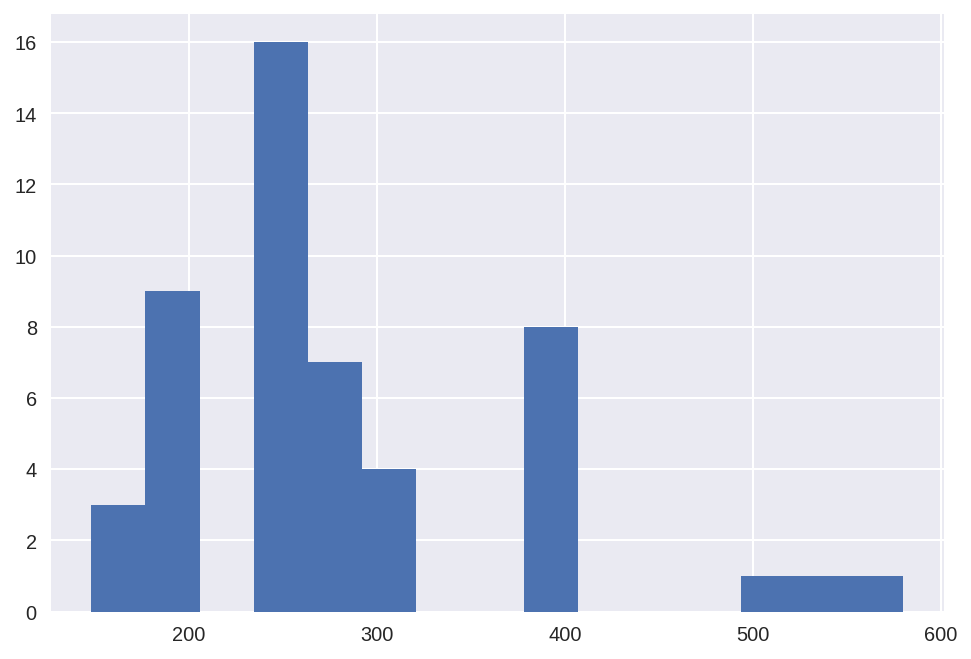

In [147]:
# Some insight into the durations of the songs we have.

import matplotlib.pyplot as plt
import numpy as np

n_bins = 15
x = np.array(durations)

fig, ax = plt.subplots()

# We can set the number of bins with the `bins` kwarg
hist = ax.hist(x, bins = n_bins)

In [0]:
def processStreamForChords(stream, display = False):
  part = stream.parts[0]
  
  # Collect the chords in the song.
  for m in part:                                            # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      if (display):
        print("Measure starts on beat:", float(m.offset))
      for c in m.notes:
        if isinstance(c, m21.harmony.ChordSymbol):          # If this object is a chord
          notesInChord = ""
          for p in c.pitches:
            p.octave = 4
            num = p.midi - 60                               # num will range from 0 to 11.
            notesInChord = notesInChord + str(num) + " "
          
          if (display):
            print(str(c.figure), "for", str(c.duration.quarterLength), "beats. Notes:", notesInChord)

In [125]:
i = getDuration(betterStreams[0])
print(i)

260.0


In [124]:
processStreamForChords(streams[0], True)

Measure starts on beat: 0.0
B- for 4.0 beats. Notes: 10 2 5 
Measure starts on beat: 4.0
Cm for 2.0 beats. Notes: 0 3 7 
F7 for 2.0 beats. Notes: 5 9 0 3 
Measure starts on beat: 8.0
B- for 4.0 beats. Notes: 10 2 5 
Measure starts on beat: 12.0
Cm for 2.0 beats. Notes: 0 3 7 
F7 for 2.0 beats. Notes: 5 9 0 3 
Measure starts on beat: 16.0
Fm for 2.0 beats. Notes: 5 8 0 
B-7 for 2.0 beats. Notes: 10 2 5 8 
Measure starts on beat: 20.0
E- for 2.0 beats. Notes: 3 7 10 
Edim for 2.0 beats. Notes: 4 7 10 
Measure starts on beat: 24.0
B- for 4.0 beats. Notes: 10 2 5 
Measure starts on beat: 28.0
Cm for 2.0 beats. Notes: 0 3 7 
F7 for 2.0 beats. Notes: 5 9 0 3 
Measure starts on beat: 32.0
B- for 4.0 beats. Notes: 10 2 5 
Measure starts on beat: 36.0
Cm for 2.0 beats. Notes: 0 3 7 
F7 for 2.0 beats. Notes: 5 9 0 3 
Measure starts on beat: 40.0
B- for 2.0 beats. Notes: 10 2 5 
G7 for 2.0 beats. Notes: 7 11 2 5 
Measure starts on beat: 44.0
Cm for 2.0 beats. Notes: 0 3 7 
F7 for 2.0 beats. Notes

In [74]:
s1 = streams[0]
print("Type is: ", type(s1), "\n")
file = s1.parts[0].show("text")

Type is:  <class 'music21.stream.Score'> 

{0.0} <music21.instrument.Instrument P1: Piano: Piano>
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.layout.SystemLayout>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=230.0>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.harmony.ChordSymbol B->
    {0.0} <music21.note.Note D>
    {0.3333} <music21.note.Note D#>
    {0.6667} <music21.note.Note E>
    {1.0} <music21.note.Note F>
    {1.5} <music21.note.Note D>
    {2.0} <music21.note.Note E->
    {2.5} <music21.note.Note F>
    {3.0} <music21.note.Rest rest>
    {3.5} <music21.note.Note D#>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.harmony.ChordSymbol Cm>
    {0.0} <music21.note.Note D#>
    {0.5} <music21.note.Note C>
    {1.0} <music21.note.Note B->
    {1.5} <music21.note.Note G>
    {2.0} <music21.harmony.ChordSymbol F7>
    {2.0} <music21.not

In [0]:
parts = [] # Takes only the piano data which we want

for stream in streams:
  parts.append(stream.parts[0])

In [0]:
# The iterator gives us the instrument and the measures. We only want measures.

minimum = 100

for m in parts[0].iter:
  if isinstance(m, m21.stream.Measure):
    for c in m.notes:
      if isinstance(c, m21.harmony.ChordSymbol):
        print(str(c.figure), str(c.duration.quarterLength))
        
        notesInChord = ""
        for p in c.pitches:
          p.octave = 4
          if p.midi < minimum:
            minimum = p.midi
          notesInChord = notesInChord + str(p.midi) + " "
        print(notesInChord)
   
print(minimum)

B-7 4.0
70 62 65 68 
B-7 4.0
70 62 65 68 
E-7 4.0
63 67 70 61 
B- 4.0
70 62 65 
Fm 2.0
65 68 60 
B-7 2.0
70 62 65 68 
E-7 4.0
63 67 70 61 
E-7 4.0
63 67 70 61 
B- 4.0
70 62 65 
B- 2.0
70 62 65 
G7 2.0
67 71 62 65 
Cm 4.0
60 63 67 
F7 4.0
65 69 60 63 
B-7 4.0
70 62 65 68 
B-7 4.0
70 62 65 68 
B-7 4.0
70 62 65 68 
E-7 4.0
63 67 70 61 
B- 4.0
70 62 65 
Fm 2.0
65 68 60 
B-7 2.0
70 62 65 68 
E-7 4.0
63 67 70 61 
E-7 4.0
63 67 70 61 
B- 4.0
70 62 65 
B- 2.0
70 62 65 
G7 2.0
67 71 62 65 
Cm 4.0
60 63 67 
F7 4.0
65 69 60 63 
B-7 4.0
70 62 65 68 
B-7 4.0
70 62 65 68 
B-7 4.0
70 62 65 68 
E-7 4.0
63 67 70 61 
B-7 4.0
70 62 65 68 
Fm 2.0
65 68 60 
B-7 2.0
70 62 65 68 
E-7 4.0
63 67 70 61 
E-7 4.0
63 67 70 61 
B- 4.0
70 62 65 
Dm 2.0
62 65 69 
D-m 2.0
61 64 68 
Cm 4.0
60 63 67 
F7 4.0
65 69 60 63 
B- 4.0
70 62 65 
Cm 2.0
60 63 67 
F7 2.0
65 69 60 63 
B-7 4.0
70 62 65 68 
E-7 4.0
63 67 70 61 
B- 4.0
70 62 65 
Fm 2.0
65 68 60 
B-7 2.0
70 62 65 68 
E-7 4.0
63 67 70 61 
E-7 4.0
63 67 70 61 
B- 4.0
70 

In [0]:
from IPython.display import Image
Image(filename = str(file))

ValueError: ignored

In [0]:
type(file)

pathlib.PosixPath

In [0]:
from IPython.display import Image
Image(filename = stream0.write("lily.png"))

AttributeError: ignored

In [0]:
noteDuration = 0
chordDuration = 0
for song in songs:
  harmony.realizeChordSymbolDurations(song)
  toParse = song.flat.recurse() # recurse() goes over all objects in the Music21 stream.
      
  for i in range(len(toParse)):
    if isinstance(toParse[i], note.Note):
      noteDuration += float(toParse[i].quarterLength)
      if(toParse[i-1].quarterLength < abs(toParse[i].offset - toParse[i-1].offset)):
        noteDuration += abs (-toParse[i-1].offset + toParse[i].offset)
    elif isinstance(toParse[i], chord.Chord):
      chordDuration += float(toParse[i].quarterLength)
  
  print("Song:",song.highestTime)
  print("Duration sum:", noteDuration)
  
  noteDuration = 0;
  chordDuration = 0;

Song: 392.0
Duration sum: 337.00000000000006
Song: 248.0
Duration sum: 204.33333333333366
Song: 264.0
Duration sum: 233.3333333333334
Song: 148.0
Duration sum: 117.28333333333349
Song: 264.0
Duration sum: 208.50000000000003
Song: 260.0
Duration sum: 210.91666666666669
Song: 260.0
Duration sum: 202.33333333333346
Song: 264.0
Duration sum: 201.50000000000003
Song: 388.0
Duration sum: 330.6666666666673
Song: 152.0
Duration sum: 126.41666666666674
Song: 196.0
Duration sum: 159.66666666666669
Song: 196.0
Duration sum: 146.08333333333331
Song: 196.0
Duration sum: 167.00000000000017
Song: 200.0
Duration sum: 140.8166666666668
Song: 196.0
Duration sum: 165.48333333333323
Song: 292.0
Duration sum: 241.58333333333343
Song: 524.0
Duration sum: 436.8833333333332
Song: 260.0
Duration sum: 197.5000000000002
Song: 260.0
Duration sum: 214.6666666666668
Song: 264.0
Duration sum: 194.16666666666688
Song: 164.0
Duration sum: 121.41666666666681
Song: 196.0
Duration sum: 165.99999999999997
Song: 388.0
Dura

In [0]:
# Converts fraction in a String to a float e.g. "1/2" to 0.5

def fracToFloat(fracString):
  try:
    return float(fracString)
  except ValueError:
    num, denom = fracString.split('/')
    try:
      leading, num = num.split(' ')
      whole = float(leading)
    except ValueError:
      whole = 0
      frac = float(num) / float(denom)
      return whole - frac if whole < 0 else whole + frac

In [0]:
def emptyArray(size):
  ar = [0]
  for x in range(size - 1):
    ar.append(0)
  return ar

In [0]:
# Parsing the songs for notes, offsets, and durations.

notes = []
noteOffsets = []
chords = []
temp = []
chordOffsets = []
noteDuration = []
chordDuration = []


for song in songs:
  harmony.realizeChordSymbolDurations(song)
  notes_to_parse = song.recurse() # recurse() goes over all objects in the Music21 stream.
      
  for element in notes_to_parse:
    tempChordPitches = []
    if isinstance(element, note.Note):
      notes.append(str(element.pitch))
      noteOffsets.append(fracToFloat(element.offset))
      noteDuration.append(float(element.quarterLength))
    elif isinstance(element, chord.Chord):
      for n in element.normalOrder:
        tempChordPitches.append(n)
      chords.append(tempChordPitches)
      chordOffsets.append(str(element.offset))
      chordDuration.append(float(element.quarterLength))

noteLength = 0
chordLength = 0

for i in range(len(notes)):
  noteLength += noteDuration[i]
for i in range(len(chords)):
  chordLength += chordDuration[i]
print((noteLength - chordLength))  

-2947.0833333333285


In [0]:
# Tells us the total duration of all songs based on original imports and summed chord duration.

total = 0
for song in songs:
  total += song.duration.quarterLength
  
print(total)

overAllLengthChords = 0
for c in range(len(chords)):
  overAllLengthChords += chordDuration[c]

print(overAllLengthChords)

14084.0
14084.0


In [0]:
# Changes chords into 1-hot encoded arrays
chordsCheck = ["C", "D-", "D", "E-", "E", "F", "G-", "G", "A-", "A", "B-", "B"]
oneChords = [[]]
oneChords[0] = emptyArray(12)
for i in range(len(chords)):
  oneChords.append(emptyArray(12))
  
index = 0
for chord in chords:
  for i in chord:
    oneChords[index][i] = 1
  index += 1

In [0]:
# Fixes enharmonic equivalents.

notes_to_change = ["C#", "D#", "E#", "F#", "G#", "A#", "F##"]
note_equivalents = ["D-", "E-", "F", "G-", "A-", "B-", "G"]

for note_number in range(len(notes)):
  #if note_number % 5000 == 0:
    #print("On note", note_number, "of", len(notes))
  if (notes[note_number] == "B#3"):
    notes[note_number] = "C4"
  if (notes[note_number] == "C-3"):
    notes[note_number] = "B2"
  if (notes[note_number] == "C-4"):
    notes[note_number] = "B3"
  if (notes[note_number] == "C-5"):
    notes[note_number] = "B4"
  if (notes[note_number] == "F-4"):
    notes[note_number] = "E4"
  if ("#" in notes[note_number]):
    for octave in range(2,6):
  
      for name_number in range(len(notes_to_change)):
        noteName = notes_to_change[name_number] + str(octave)
        if (noteName == notes[note_number]):
          new_name = note_equivalents[name_number] + str(octave)
          notes[note_number] = new_name

In [0]:
#Identify how many unique notes and chord durations there are
notesCheck = []
noteDurationCheck = []
chordsTotal= []
chordDurationCheck = []
for e in notes:
  if e not in notesCheck:
    notesCheck.append(e)

for e in noteDuration:
  if e not in noteDurationCheck:
    noteDurationCheck.append(e)
    
for e in chords:
  if e not in chordsTotal:
    chordsTotal.append(e)
    
for e in chordDuration:
  if e not in chordDurationCheck:
    chordDurationCheck.append(e)

print("Number of unique notes: ", len(notesCheck))
print("Number of unique note durations: ", len(noteDurationCheck))
print("Number of unique chords: ", len(chordsTotal))
print("Number of unique chord durations: ", len(chordDurationCheck))

for e in noteDurationCheck:
  print(e)

Number of unique notes:  41
Number of unique note durations:  15
Number of unique chords:  44
Number of unique chord durations:  4
0.5
1.0
0.3333333333333333
3.0
2.0
1.5
0.16666666666666666
0.25
0.75
0.125
0.2
4.0
0.6666666666666666
0.08333333333333333
0.8


In [0]:
# Finding the notes that are 4 beats.
totals = []
possible_lengths = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

for length in possible_lengths:
  for i in range(len(noteDuration)):
    if noteDuration[i] == length:
      off = noteOffsets[i]
      total = off + length
      totals.append(total)
    
for totals in totals:
  if total != 4:
    print(total)

In [0]:
#Adds note to 1-hot encoded array
def addTo(ar, note):
  for i,j in enumerate(notesCheck):
    if(note == j):
      ar[i] = 1
      break

In [0]:
def getNote(ar):
  notes = []
  for i in range (len(notesCheck)):
    if ar[i] == 1:
      notes.append(str(notesCheck[i]))
  return notes

In [0]:
# Checks if a given chord is part of a new measure.
def newMeasure(c):
  if (c == 0):
    return False
  if (chordOffset[c-1] >= chordOffset[c]):
    return True
  return False

In [0]:
# Changes notes into 1-hot encoded arrays
oneNotes = [[]]
oneNotes[0] = emptyArray(42)
for i in range(len(notes)-1):
  oneNotes.append(emptyArray(42))
  
index = 0

for e in notes:
  for i,j in enumerate(notesCheck):
    if(e == j):
      oneNotes[index][i] = 1
      break
  if 1 not in oneNotes[index]:
    oneNotes[41] = 1
  index = index + 1

In [0]:
# Creates an array of Notes being played at each timestep
arrays = []
indexOfNotes = []
tempIndex = 0
noteIndex = 0
temp = []
index = 0
endMeasure = False
first = True

while noteIndex < len(notes):
  first = True
  for i in range(1,49): # Goes from 0 to 4 in 48 intervals.
    temp = []
    if(float(i/12) > noteOffsets[noteIndex] and not endMeasure):
      first = False
      for i in range(len(oneNotes[0])):
        temp.append(oneNotes[noteIndex][i])
        indexOfNotes.append(tempIndex)
      noteIndex += 1
    else:
      temp = emptyArray(42)
    arrays.append(temp)
    tempIndex+=1
    if(len(noteOffsets) - noteIndex <= 0):
      break
    if(noteOffsets[noteIndex] < noteOffsets[noteIndex-1] and not first):
      endMeasure = True
  
  endMeasure = False
  

print(len(arrays))
print(128945/48)

148945
2686.3541666666665


In [0]:
chordArrays = []
indexOfChords = []
tempIndex = 0
chordIndex = 0
test = [0,0,0]


while(chordIndex < len(chords)):
  for i in range(int(chordDuration[chordIndex]*12)):
    chordArrays.append(oneChords[chordIndex])
    if(i==0):
      indexOfChords.append(chordIndex)
  chordIndex+=1

print(chordDuration[0])  
for i in range(50):
  print("i: ", i, " " ,chordArrays[i])
print(len(chordArrays) - len(arrays))      

2.0
i:  0   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  1   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  2   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  3   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  4   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  5   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  6   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  7   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  8   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  9   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  10   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  11   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  12   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  13   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  14   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  15   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  16   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  17   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  18   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  19   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  20   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
i:  21   [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 

In [0]:
#Start of looping through timeSteps
counter = 0
length = float(1/12)
numerator = 0
index = 0
noteIndex = 0
# This doesn't work. I want to loop through the array of timeSteps, then if a timestep has a note, then adding that note to every timestep in its duration

#for i in range(0,10):
#  print("note: ", notes[i], " duration: ", noteDuration[i])    
noteIndex = 0

for i in range(len(arrays)):
  if (1 in arrays[i] and i == indexOfNotes[noteIndex]):
    numerator = 1
    length = float(numerator/12)
    #print("note Index: ", noteIndex, " noteDuration: ", noteDuration[noteIndex], " note: ", notes[noteIndex])
    for j in range(1,int(noteDuration[noteIndex]*12)):
      addTo(arrays[i+j],notes[noteIndex])
    noteIndex+=1
    if (noteIndex == len(notes)-1):
      break
    if(noteIndex % 100 == 0):
      print(noteIndex)
      
print("After")
noteIndex = 0
for i in range(50, 100):
  print(arrays[i])
  if 1 in arrays[i]:
    print(getNote(arrays[i]))
    noteIndex+=1

After
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['C4']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [0]:
#creates input layer

tracker = 0
input = []


for i in range(tracker,tracker+12):
  for j in chordArrays[tracker]:
    input.append(j)
    
    
print(len(input))      

144


In [0]:
overAllLengthNotes = 0
sumInMeasure = 0
measures = 1

for n in range(len(notes)):
  curr_offset = noteOffsets[n]
  curr_dur = noteDuration[n]
  if (curr_offset <= noteOffsets[n-1]): # New measure.
    overAllLengthNotes += sumInMeasure
    sumInMeasure = curr_dur
    measures += 1
  if (curr_offset > sumInMeasure): # Note after a rest.
    sumInMeasure = curr_dur + curr_offset
  else:
    sumInMeasure += curr_dur

print(overAllLengthNotes)

13720.05


In [0]:
# set measure counter to 0
# 
# go through all notes (while)
#     we have a note with duration and offset
#     use offset from the measure start to begin note
#     store note duration
#     calculate how many time steps the note is based on round dur / stepsize
#     set that many timesteps to the given note
#     if next note's offset is more
#          move to the next note's offset from the measure start
#     set that many steps to the note
#     
# method next note valid based on note number
# if not up measure

curr_offset = 0
measure = 0
timesteps = []
timestep = 0
for c in range(len(chord)):
  curr_step = []
  curr_offset = chordOffsets[c]
  curr_chord = chords[c]
  curr_dur = chordDuration[c]
  
  step = curr_chord
  